In [29]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras import optimizers
from sklearn import model_selection
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import keras
from tensorflow.keras import regularizers
# importando o ImageDataGenerator
from tensorflow.keras.initializers import HeNormal, HeUniform
from keras.models import load_model
import tensorflow as tf


In [30]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

In [31]:
RANDOM_STATE = 42
BATCH_SIZE = 32
nomes_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Passando os dados para float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Dividindo os dados por 255.0 para normalizar
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transformando os labels em one-hot-encoding
Y_train_one_hot = keras.utils.to_categorical(Y_train, 10)
Y_test_one_hot = keras.utils.to_categorical(Y_test, 10)


print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)

X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)


# Rede neural Mais Profunda

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer=HeUniform(),
                   input_shape=(32, 32, 3), padding='same'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer=HeUniform(),
                   padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer=HeUniform(),
                   padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer=HeUniform(),
                   padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer=HeUniform(),
                   padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer=HeUniform(),
                   padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu', kernel_initializer=HeUniform()
                 ))
model.add(Dense(units=10, activation='softmax'))

# Checkpoint
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Compilando o modelo
optmizer = optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optmizer, metrics=['accuracy'])

#printando os parametros da rede
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = model.fit(X_train, Y_train_one_hot, epochs=10, batch_size=BATCH_SIZE, validation_data=(X_test, Y_test_one_hot), verbose=1, callbacks=[mc])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3816 - loss: 1.6851
Epoch 1: val_accuracy improved from -inf to 0.63320, saving model to best_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3816 - loss: 1.6849 - val_accuracy: 0.6332 - val_loss: 1.0283
Epoch 2/10
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6714 - loss: 0.9380
Epoch 2: val_accuracy improved from 0.63320 to 0.71880, saving model to best_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.6714 - loss: 0.9380 - val_accuracy: 0.7188 - val_loss: 0.8036
Epoch 3/10
1559/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7489 - loss: 0.7118
Epoch 3: val_accuracy did not improve from 0.71880
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7489 - loss: 0.7117 - val_accuracy: 0.7164 - val_loss: 0.8288
Epoch 4/10
1554/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8000 - loss: 0.5724
Epoch 4: val_accuracy improved from 0.71880 to 0.75050, saving

In [34]:
# carregando o melhor modelo
model = load_model('best_model.keras')

--> Acuracia (treino): 0.9339
--> Acuracia (teste): 0.7577
--> Ein - Eval = 0.1762
--> test_loss - train_loss = 0.7670



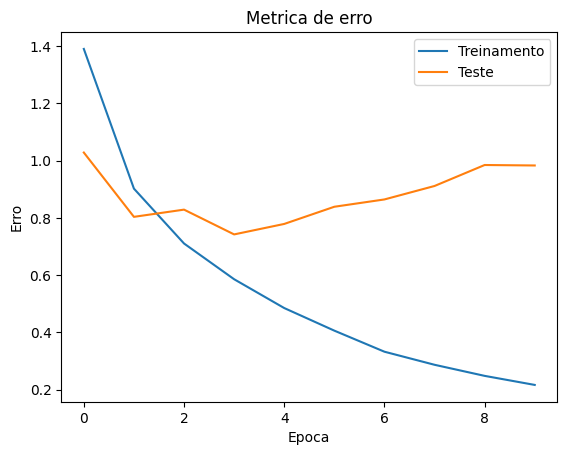

In [35]:
# Calculando a acuracia
_, accuracy_train = model.evaluate(X_train, Y_train_one_hot, batch_size=BATCH_SIZE, verbose=0)
_, accuracy_val = model.evaluate(X_test, Y_test_one_hot, batch_size=BATCH_SIZE, verbose=0)

# Plotando os resultados
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Teste'])


print(f'--> Acuracia (treino): {accuracy_train:.4f}')
print(f'--> Acuracia (teste): {accuracy_val:.4f}')
print(f"--> Ein - Eval = {accuracy_train - accuracy_val:.4f}")
print(f"--> test_loss - train_loss = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}\n")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Classification Report (treino):
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      5000
           1       0.99      0.95      0.97      5000
           2       0.96      0.86      0.91      5000
           3       0.89      0.87      0.88      5000
           4       0.92      0.91      0.92      5000
           5       0.90      0.91      0.91      5000
           6       0.94      0.95      0.95      5000
           7       0.99      0.88      0.93      5000
           8       0.95      0.99      0.97      5000
           9       0.96      0.97      0.97      5000

   micro avg       0.95      0.92      0.93     50000
   macro avg       0.95      0.92      0.93     50000
weighted avg       0.95      0.92      0.93     50000
 samples avg       0.92      0.92      0.92     50000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


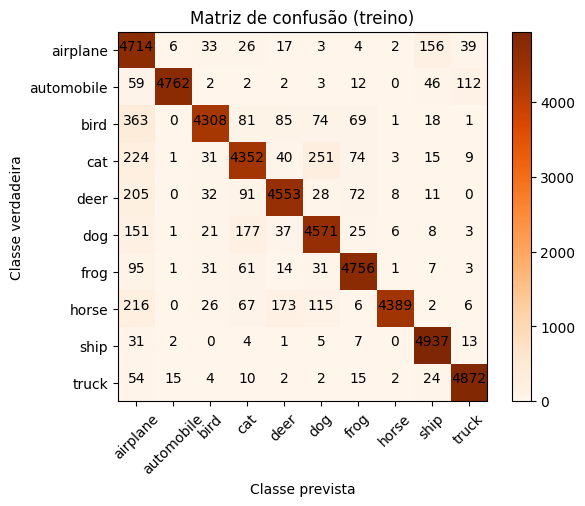

In [36]:
# Avaliando o modelo com o classification report e a matriz de confusao

# Predição
Y_pred_train = np.round(model.predict(X_train))
print('Classification Report (treino):')
print(classification_report(Y_train_one_hot, Y_pred_train))

# Pegando a posição do maior valor
Y_pred_train = np.argmax(Y_pred_train, axis=1)

matriz_confusao = confusion_matrix(Y_train, Y_pred_train)
plt.imshow(matriz_confusao, cmap='Oranges')
plt.title('Matriz de confusão (treino)')
plt.colorbar()
tick_marks = np.arange(len(nomes_classes))

plt.xticks(tick_marks, nomes_classes, rotation=45)
plt.yticks(tick_marks, nomes_classes)
plt.ylabel('Classe verdadeira')
plt.xlabel('Classe prevista')
# Adicionando os valores numéricos dentro das células
for i in range(matriz_confusao.shape[0]):
    for j in range(matriz_confusao.shape[1]):
        plt.text(j, i, str(matriz_confusao[i, j]), horizontalalignment="center", color="black") # Adiciona o valor da célula
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report (teste):
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1000
           1       0.92      0.83      0.87      1000
           2       0.76      0.62      0.68      1000
           3       0.59      0.57      0.58      1000
           4       0.72      0.68      0.70      1000
           5       0.66      0.66      0.66      1000
           6       0.80      0.82      0.81      1000
           7       0.90      0.69      0.78      1000
           8       0.82      0.90      0.85      1000
           9       0.86      0.86      0.86      1000

   micro avg       0.78      0.74      0.76     10000
   macro avg       0.79      0.74      0.76     10000
weighted avg       0.79      0.74      0.76     10000
 samples avg       0.74      0.74      0.74     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


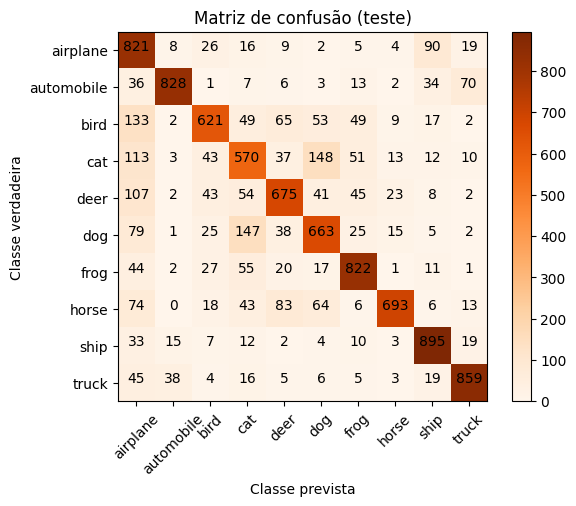

In [37]:
# Teste
Y_pred_test = np.round(model.predict(X_test))
Y_test_one_hot = keras.utils.to_categorical(Y_test, 10)
print('Classification Report (teste):')
print(classification_report(Y_test_one_hot, Y_pred_test))

# Pegando a posição do maior valor
Y_pred_test = np.argmax(Y_pred_test, axis=1)

matriz_confusao = confusion_matrix(Y_test, Y_pred_test)
plt.imshow(matriz_confusao, cmap='Oranges')
plt.title('Matriz de confusão (teste)')
plt.colorbar()
tick_marks = np.arange(len(nomes_classes))

plt.xticks(tick_marks, nomes_classes, rotation=45)
plt.yticks(tick_marks, nomes_classes)
plt.ylabel('Classe verdadeira')
plt.xlabel('Classe prevista')
# Adicionando os valores numéricos dentro das células
for i in range(matriz_confusao.shape[0]):
    for j in range(matriz_confusao.shape[1]):
        plt.text(j, i, str(matriz_confusao[i, j]), horizontalalignment="center", color="black") # Adiciona o valor da célula
plt.show()